**NAME:** RUPESH DHIRWANI

**CLASS:** D16AD

**ROLL NO:** 10

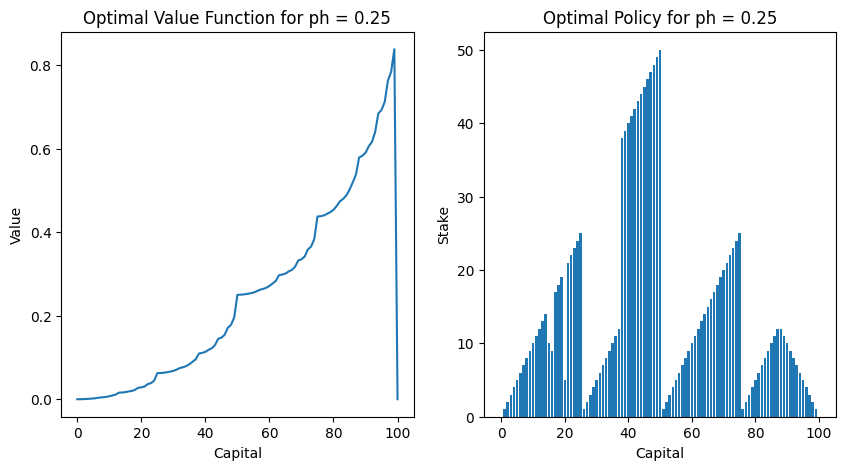

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 10.  9. 17.
 18. 19.  5. 21. 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Optimized Value Function:
[0.00000000e+00 7.28459563e-05 2.91426259e-04 6.95257448e-04
 1.16577863e-03 1.77125235e-03 2.78105366e-03 4.03661077e-03
 4.66311452e-03 5.60140889e-03 7.08500942e-03 9.04085029e-03
 1.11242325e-02 1.56796345e-02 1.61464431e-02 1.69534393e-02
 1.86524581e-02 1.98260567e-02 2.24056377e-02 2.73847259e-02
 2.83400794e-02 3.04945425e-02 3.61635444e-02 3.84959069e-02
 4.44969302e-02 6.25000000e-02 6.27185697e-02 6.33743340e-02
 6.45857902e-02 6.59973359e-02 6.78137571e-02 7.08431744e-02
 7.46098323e-02 7.64893436e-02 7.93042283e-02 8.37550596

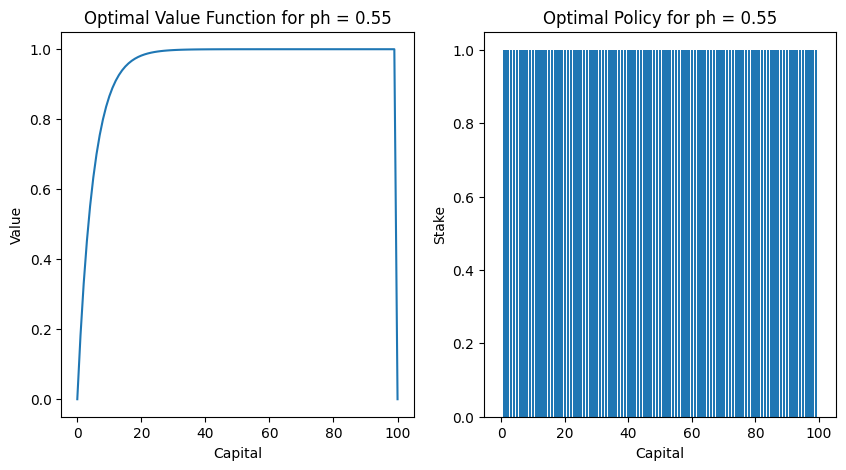

Optimized Policy:
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0.]

Optimized Value Function:
[0.         0.18179384 0.33053471 0.45223242 0.55180402 0.63327253
 0.6999295  0.75446798 0.79909135 0.83560237 0.86547602 0.88991908
 0.9099189  0.92628333 0.93967331 0.95062962 0.95959471 0.96693057
 0.9729334  0.97784552 0.98186521 0.98515468 0.98784666 0.99004975
 0.99185281 0.99332852 0.99453639 0.99552506 0.99633437 0.9969969
 0.99753931 0.99798341 0.99834706 0.99864485 0.99888875 0.99908852
 0.99925219 0.99938628 0.99949617 0.99958624 0.99966008 0.99972062
 0.99977028 0.99981103 0.99984446 0.99987191 0.99989445 0.99991297
 0.99992819 0.99994071 0.999951   0.99995948 0.99996646 0.99997221
 0.99997696 0.99998087 0.99998411 0.99998678

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(ph, theta=1e-6, max_iter=1000, gamma=1.0, goal=100):
    V = np.zeros(goal + 1)

    def one_step_lookahead(s, V, ph):
        actions = np.arange(1, min(s, goal - s) + 1)
        action_returns = np.zeros(actions.shape)
        for a in actions:
            action_returns[a - 1] = ph * (1 if s + a >= goal else V[s + a]) + (1 - ph) * V[s - a]
        return action_returns.max()

    for _ in range(max_iter):
        delta = 0
        for s in range(1, goal):
            v = V[s]
            V[s] = one_step_lookahead(s, V, ph)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break

    policy = np.zeros(goal + 1)
    for s in range(1, goal):
        actions = np.arange(1, min(s, goal - s) + 1)
        action_returns = np.zeros(actions.shape)
        for a in actions:
            action_returns[a - 1] = ph * (1 if s + a >= goal else V[s + a]) + (1 - ph) * V[s - a]
        policy[s] = actions[np.argmax(action_returns)]

    return V, policy

def plot_results(V, policy, ph):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(V)
    plt.title("Optimal Value Function for ph = {}".format(ph))
    plt.xlabel("Capital")
    plt.ylabel("Value")

    plt.subplot(1, 2, 2)
    plt.bar(range(len(policy)), policy)
    plt.title("Optimal Policy for ph = {}".format(ph))
    plt.xlabel("Capital")
    plt.ylabel("Stake")
    plt.show()

ph_values = [0.25, 0.55]

for ph in ph_values:
    V, policy = value_iteration(ph)
    plot_results(V, policy, ph)
    print("Optimized Policy:")
    print(policy)
    print("")

    print("Optimized Value Function:")
    print(V)
    print("")